In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization, Conv2D, MaxPooling2D

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 14s 0us/step


In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [5]:
x_train = x_train / 255
x_test = x_test / 255

In [6]:
one_hot_encoder = OneHotEncoder(sparse = False)
one_hot_encoder.fit(y_train)
y_train = one_hot_encoder.transform(y_train)
y_test = one_hot_encoder.transform(y_test)

# 1a. The network should not use any padding

In [7]:
model = Sequential()
x_shape = x_train.shape[1:]

model.add(Conv2D(16, kernel_size = (3, 3), input_shape = x_shape, activation ="relu", padding='valid'))
model.add(BatchNormalization())
model.add(Conv2D(16, kernel_size = (3, 3), input_shape = x_shape, activation ="relu", padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(32, kernel_size = (3, 3), input_shape = x_shape, activation ="relu", padding='valid'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = (3, 3), input_shape = x_shape, activation ="relu", padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

# model.add(Conv2D(64, kernel_size = (3, 3), input_shape = x_shape, activation ="relu", padding='valid'))
# model.add(BatchNormalization())
# model.add(Conv2D(64, kernel_size = (3, 3), input_shape = x_shape, activation ="relu", padding='valid'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D((2,2)))
# model.add(Dropout(0.3))

model.add(Conv2D(128, kernel_size = (3, 3), input_shape = x_shape, activation ="relu", padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), padding='valid'))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(80, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation = 'softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        2320      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 16)       64        
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                        

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
history = model.fit(x_train, y_train, epochs = 5 , batch_size = 64, validation_split = 0.2)

Epoch 1/5
625/625 [==============================] - 37s 57ms/step - loss: 1.9826 - accuracy: 0.2856 - val_loss: 1.7613 - val_accuracy: 0.3634
Epoch 2/5
625/625 [==============================] - 35s 55ms/step - loss: 1.6331 - accuracy: 0.3958 - val_loss: 1.4550 - val_accuracy: 0.4640
Epoch 3/5
625/625 [==============================] - 31s 49ms/step - loss: 1.4733 - accuracy: 0.4625 - val_loss: 1.3681 - val_accuracy: 0.5050
Epoch 4/5
625/625 [==============================] - 23s 37ms/step - loss: 1.3810 - accuracy: 0.5037 - val_loss: 1.2434 - val_accuracy: 0.5567
Epoch 5/5
625/625 [==============================] - 23s 37ms/step - loss: 1.3142 - accuracy: 0.5342 - val_loss: 1.1881 - val_accuracy: 0.5753


Text(0.5, 1.0, 'Loss Curves')

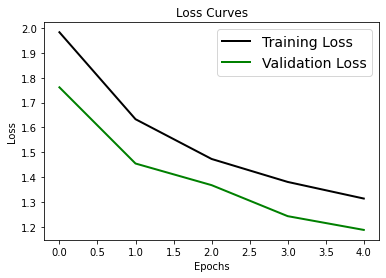

In [10]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

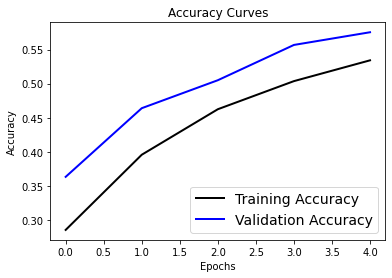

In [11]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

In [12]:
# Making the Predictions
pred = model.predict(x_test)
pred_classes = np.argmax(pred, axis=1)

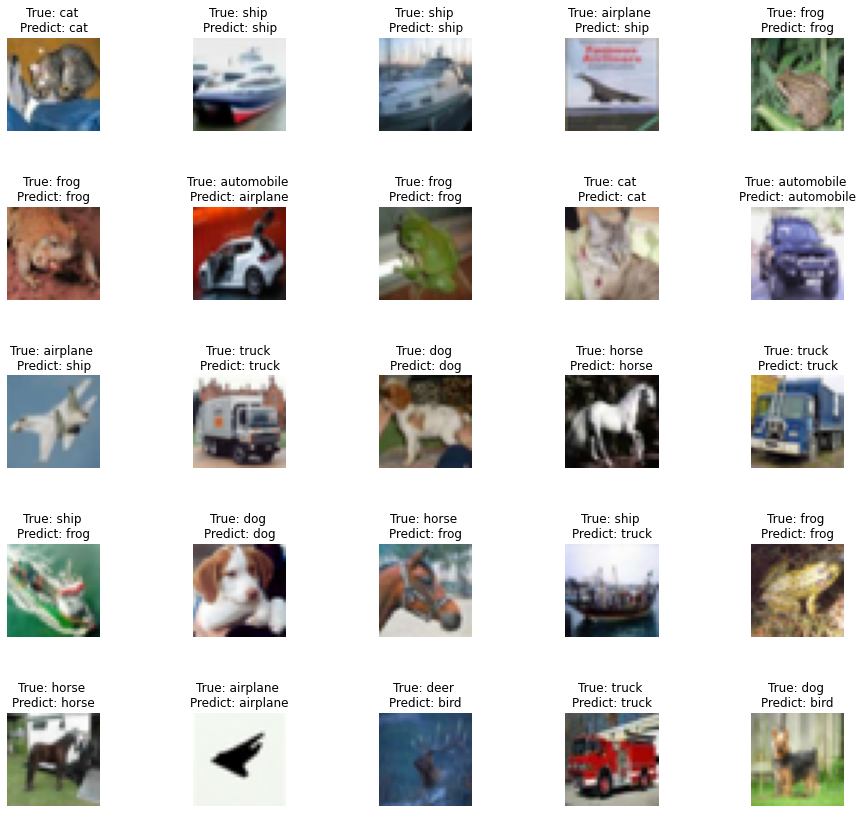

In [13]:
# Plotting the Actual vs. Predicted results

fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(x_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(y_test[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

# 1b. With padding

In [14]:
model = Sequential()
x_shape = x_train.shape[1:]

model.add(Conv2D(16, kernel_size = (3, 3), input_shape = x_shape, activation ="relu", padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(16, kernel_size = (3, 3), input_shape = x_shape, activation ="relu", padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.3))

model.add(Conv2D(32, kernel_size = (3, 3), input_shape = x_shape, activation ="relu", padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = (3, 3), input_shape = x_shape, activation ="relu", padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.3))

model.add(Conv2D(64, kernel_size = (3, 3), input_shape = x_shape, activation ="relu", padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = (3, 3), input_shape = x_shape, activation ="relu", padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.3))

model.add(Conv2D(128, kernel_size = (3, 3), input_shape = x_shape, activation ="relu", padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(80, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation = 'softmax'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 batch_normalization_5 (Batc  (None, 32, 32, 16)       64        
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 16)        2320      
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 16)       64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                      

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
history = model.fit(x_train, y_train, epochs = 5 , batch_size = 64, validation_split = 0.2)

Epoch 1/5
625/625 [==============================] - 43s 68ms/step - loss: 1.8731 - accuracy: 0.3102 - val_loss: 1.7680 - val_accuracy: 0.3679
Epoch 2/5
625/625 [==============================] - 42s 67ms/step - loss: 1.4974 - accuracy: 0.4506 - val_loss: 1.2816 - val_accuracy: 0.5430
Epoch 3/5
625/625 [==============================] - 42s 66ms/step - loss: 1.3123 - accuracy: 0.5272 - val_loss: 1.1516 - val_accuracy: 0.5886
Epoch 4/5
625/625 [==============================] - 41s 66ms/step - loss: 1.1940 - accuracy: 0.5755 - val_loss: 0.9954 - val_accuracy: 0.6369
Epoch 5/5
625/625 [==============================] - 42s 67ms/step - loss: 1.1038 - accuracy: 0.6073 - val_loss: 1.4390 - val_accuracy: 0.5188


Text(0.5, 1.0, 'Loss Curves')

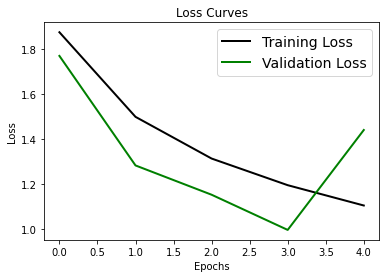

In [17]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

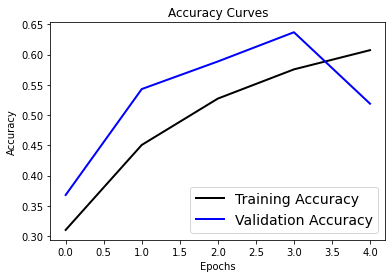

In [18]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

In [19]:
# Making the Predictions
pred = model.predict(x_test)
pred_classes = np.argmax(pred, axis=1)

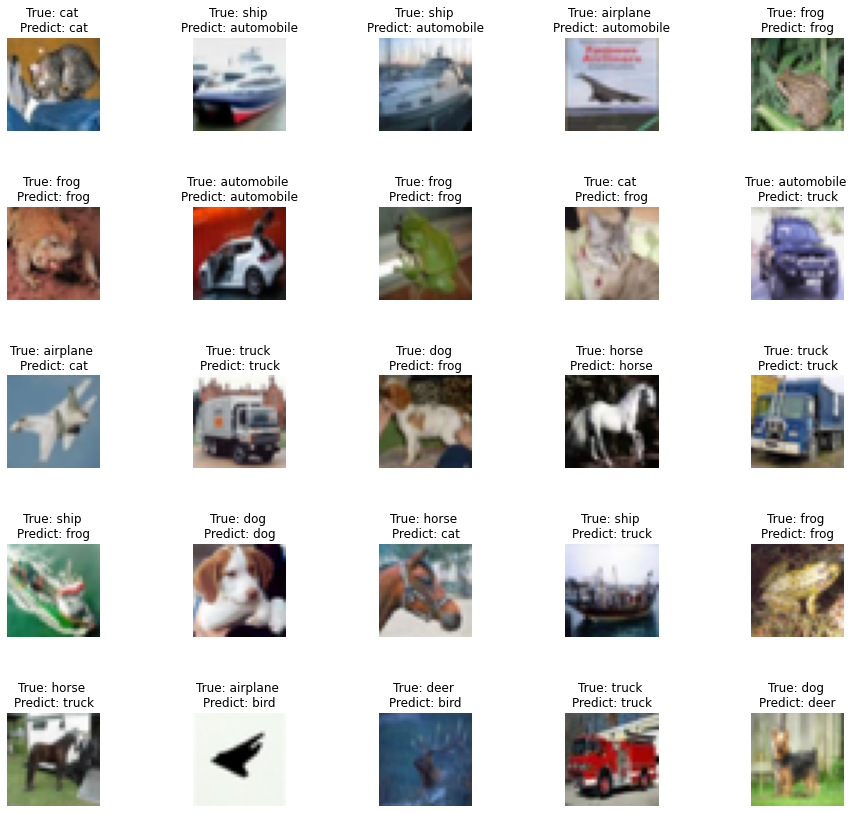

In [20]:
# Plotting the Actual vs. Predicted results

fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(x_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(y_test[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

# 2. Built the network defined in Q. 1 without a pooling layer

In [21]:
model = Sequential()
x_shape = x_train.shape[1:]

model.add(Conv2D(16, kernel_size = (3, 3), input_shape = x_shape, activation ="relu", padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(16, kernel_size = (3, 3), input_shape = x_shape, activation ="relu", padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(32, kernel_size = (3, 3), input_shape = x_shape, activation ="relu", padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = (3, 3), input_shape = x_shape, activation ="relu", padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, kernel_size = (3, 3), input_shape = x_shape, activation ="relu", padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = (3, 3), input_shape = x_shape, activation ="relu", padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(128, kernel_size = (3, 3), input_shape = x_shape, activation ="relu", padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(80, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation = 'softmax'))
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 batch_normalization_12 (Bat  (None, 32, 32, 16)       64        
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 16)        2320      
                                                                 
 batch_normalization_13 (Bat  (None, 32, 32, 16)       64        
 chNormalization)                                                
                                                                 
 dropout_9 (Dropout)         (None, 32, 32, 16)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 32)       

In [22]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
history = model.fit(x_train, y_train, epochs = 5 , batch_size = 64, validation_split = 0.2)

Epoch 1/5
625/625 [==============================] - 287s 458ms/step - loss: 2.2402 - accuracy: 0.1400 - val_loss: 2.1381 - val_accuracy: 0.1497
Epoch 2/5
625/625 [==============================] - 290s 464ms/step - loss: 2.0983 - accuracy: 0.1612 - val_loss: 1.9659 - val_accuracy: 0.2086
Epoch 3/5
625/625 [==============================] - 286s 458ms/step - loss: 2.0791 - accuracy: 0.1652 - val_loss: 1.9581 - val_accuracy: 0.1821
Epoch 4/5
625/625 [==============================] - 286s 457ms/step - loss: 2.0606 - accuracy: 0.1691 - val_loss: 1.9101 - val_accuracy: 0.2063
Epoch 5/5
625/625 [==============================] - 287s 459ms/step - loss: 2.0498 - accuracy: 0.1752 - val_loss: 1.8691 - val_accuracy: 0.2150


Text(0.5, 1.0, 'Loss Curves')

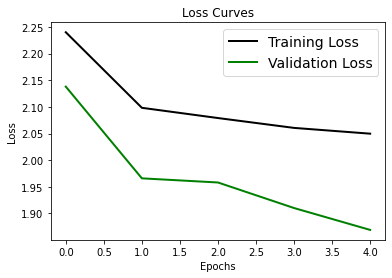

In [24]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

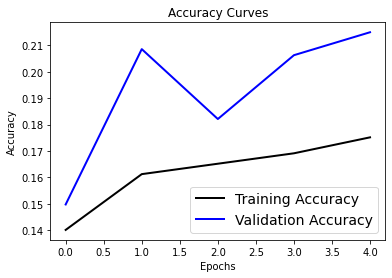

In [25]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

In [26]:
# Making the Predictions
pred = model.predict(x_test)
pred_classes = np.argmax(pred, axis=1)

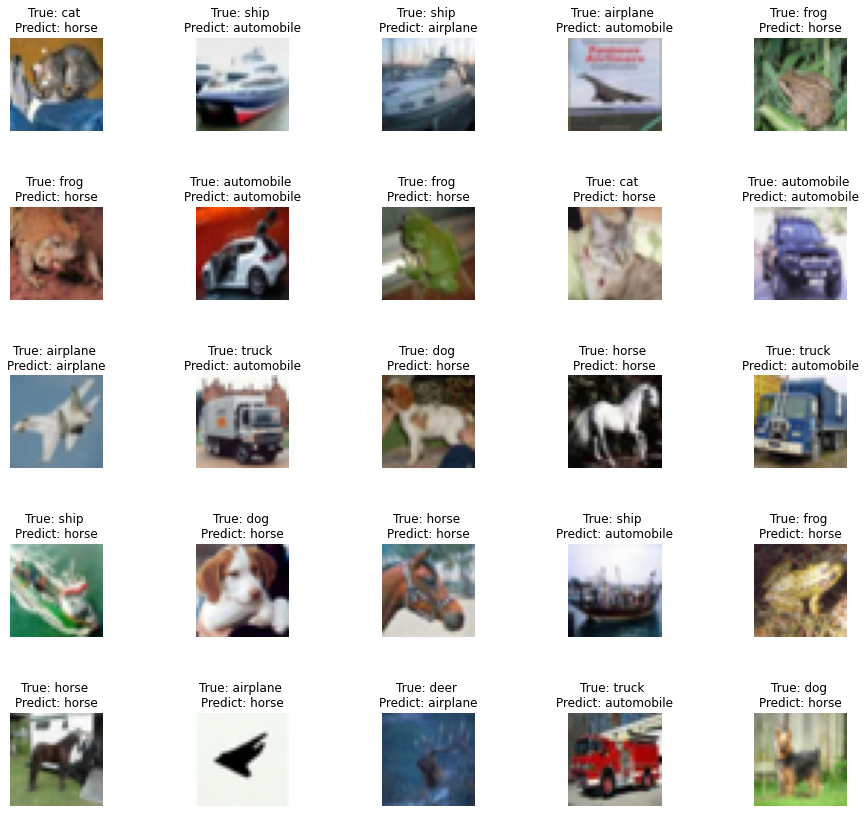

In [27]:
# Plotting the Actual vs. Predicted results

fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(x_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(y_test[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

# 3. Increase the number of filters in each layer by a factor of 2.

In [31]:
model = Sequential()
x_shape = x_train.shape[1:]

model.add(Conv2D(32, kernel_size = (3, 3), input_shape = x_shape, activation ="relu", padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = (3, 3), input_shape = x_shape, activation ="relu", padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.3))

model.add(Conv2D(64, kernel_size = (3, 3), input_shape = x_shape, activation ="relu", padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = (3, 3), input_shape = x_shape, activation ="relu", padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.3))

model.add(Conv2D(128, kernel_size = (3, 3), input_shape = x_shape, activation ="relu", padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size = (3, 3), input_shape = x_shape, activation ="relu", padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.3))

model.add(Conv2D(256, kernel_size = (3, 3), input_shape = x_shape, activation ="relu", padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(80, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation = 'softmax'))
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_26 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_27 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_27 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                      

In [32]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
history = model.fit(x_train, y_train, epochs = 5 , batch_size = 64, validation_split = 0.2)

Epoch 1/5
625/625 [==============================] - 82s 131ms/step - loss: 1.7878 - accuracy: 0.3492 - val_loss: 1.4609 - val_accuracy: 0.4710
Epoch 2/5
625/625 [==============================] - 81s 130ms/step - loss: 1.3522 - accuracy: 0.5114 - val_loss: 1.1703 - val_accuracy: 0.5823
Epoch 3/5
625/625 [==============================] - 81s 130ms/step - loss: 1.1435 - accuracy: 0.5954 - val_loss: 0.9188 - val_accuracy: 0.6684
Epoch 4/5
625/625 [==============================] - 82s 131ms/step - loss: 0.9958 - accuracy: 0.6547 - val_loss: 0.9057 - val_accuracy: 0.6811
Epoch 5/5
625/625 [==============================] - 83s 133ms/step - loss: 0.8862 - accuracy: 0.6947 - val_loss: 0.8642 - val_accuracy: 0.7046


Text(0.5, 1.0, 'Loss Curves')

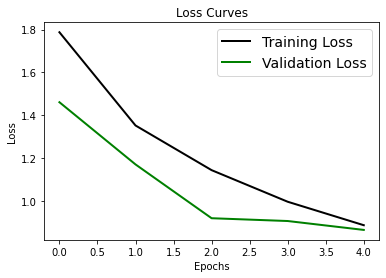

In [34]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

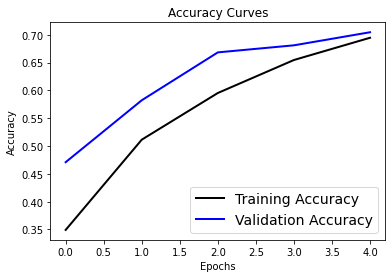

In [35]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

In [36]:
# Making the Predictions
pred = model.predict(x_test)
pred_classes = np.argmax(pred, axis=1)

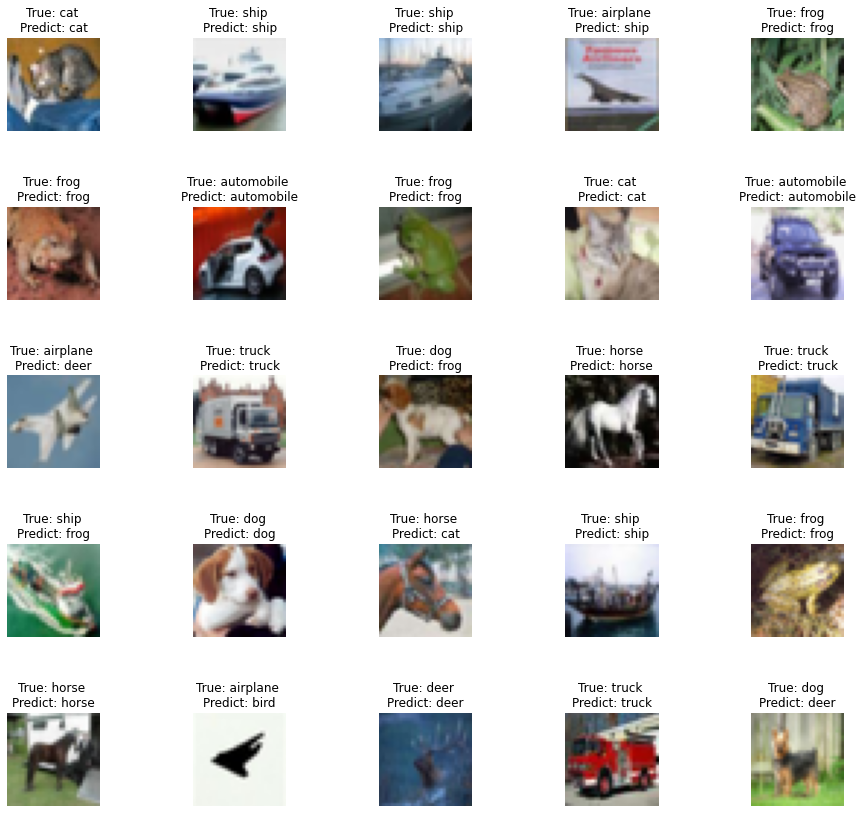

In [37]:
# Plotting the Actual vs. Predicted results

fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(x_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(y_test[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

In [38]:
 # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
from matplotlib import pyplot

import warnings
warnings.filterwarnings('ignore')

In [63]:
for i in range(len(model.layers)):
    layer = model.layers[i]
    if 'conv' not in layer.name:
        continue    
    print(i , layer.name , layer.output.shape)

0 conv2d_26 (None, 32, 32, 32)
2 conv2d_27 (None, 32, 32, 32)
6 conv2d_28 (None, 16, 16, 64)
8 conv2d_29 (None, 16, 16, 64)
12 conv2d_30 (None, 8, 8, 128)
14 conv2d_31 (None, 8, 8, 128)
18 conv2d_32 (None, 4, 4, 256)


In [64]:
model = Model(inputs=model.inputs , outputs=model.layers[1].output)

In [68]:
image = load_img("airplane.jpg" , target_size=(32,32))
image = img_to_array(image)
# expand dimensions so that it represents a single 'sample'
image = expand_dims(image, axis=0)

In [69]:
image = preprocess_input(image)

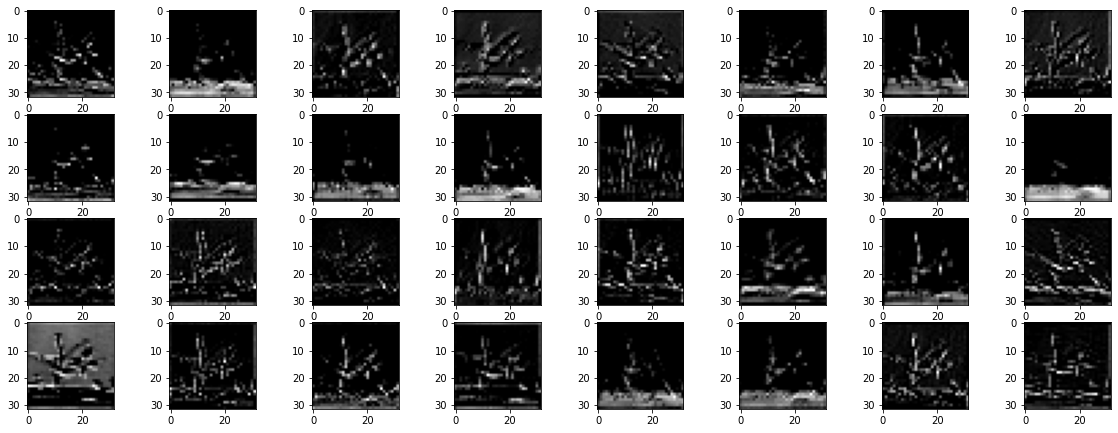

In [70]:
#calculating features_map
features = model.predict(image)

fig = pyplot.figure(figsize=(20,15))
for i in range(1,features.shape[3]+1):

    pyplot.subplot(8,8,i)
    pyplot.imshow(features[0,:,:,i-1] , cmap='gray')
    
pyplot.show()